**TAREA 4 - ALGORITMOS DE APRENDIZAJE NO SUPERVISADO**

**Realizado por:**

**LUIS CARLOS PIMIENTA HENAO**

**Grupo: 202016908_1**

**UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD**

**PROGRAMA DE INGENIERIA DE SISTEMAS**

**ANALISIS DE DATOS**

**BARRANQUILLA (ATLÁNTICO)**

**ABRIL 2024.**


**K-Means**

**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [32]:
#Cargar Librerias.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [33]:
#Lectura datos Pyton y se cargan las variables

Datos = pd.read_csv('Mall_Customers.csv')
Datos.head(10)

,Cedula,Genero,Edad,Ingreso_Anual,Puntos_Compra (1-100)
0,1,Masculino,19,15,39
1,2,Masculino,21,15,81
2,3,Femenino,20,16,6
3,4,Femenino,23,16,77
4,5,Femenino,31,17,40
5,6,Femenino,22,17,76
6,7,Femenino,35,18,6
7,8,Femenino,23,18,94
8,9,Masculino,64,19,3
9,10,Femenino,30,19,72


In [34]:
Datos.describe()

,Cedula,Edad,Ingreso_Anual,Puntos_Compra (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
Datos.shape

(200, 5)

In [36]:
Datos.isna().sum()

Cedula                   0
Genero                   0
Edad                     0
Ingreso_Anual            0
Puntos_Compra (1-100)    0
dtype: int64

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

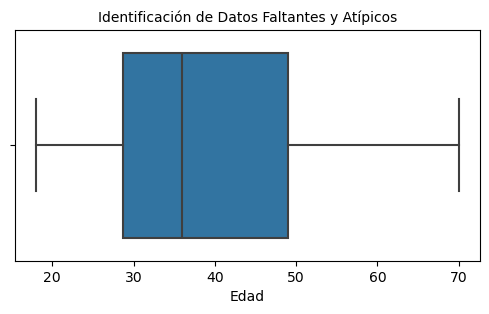

In [37]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Edad']) # Age = Edad
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

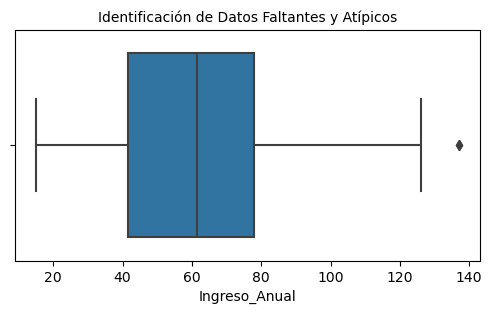

In [38]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Ingreso_Anual']) # Age = Edad
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

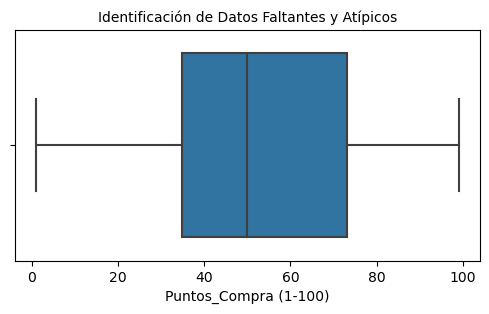

In [53]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Puntos_Compra (1-100)']) # Age = Edad
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

**2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [39]:
print("Cantidad de Registros con cero en Cedula: ", Datos['Cedula'].isin([0]).sum())
print("Cantidad de Registros con cero en Genero: ", Datos['Genero'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ", Datos['Edad'].isin([0]).sum())
print("Cantidad de Registros con cero en Ingreso Anual: ", Datos['Ingreso_Anual'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntuacion de Compras: ", Datos['Puntos_Compra (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Cedula:  0
Cantidad de Registros con cero en Genero:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Ingreso Anual:  0
Cantidad de Registros con cero en Puntuacion de Compras:  0


In [40]:
#Conteo Datos Atípicos

# Niveles de puntajes desde el minimo hasta el maximo

puntaje_mix=0
puntaje_max=100
Total_Atipicos=((Datos['Puntos_Compra (1-100)']<puntaje_mix)|(Datos['Puntos_Compra (1-100)']>puntaje_max)).sum()
print("El total de datos atipicos es: {}".format(Total_Atipicos))

El total de datos atipicos es: 0


In [41]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cedula                 200 non-null    int64 
 1   Genero                 200 non-null    object
 2   Edad                   200 non-null    int64 
 3   Ingreso_Anual          200 non-null    int64 
 4   Puntos_Compra (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**3.	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.**

In [42]:
Datos = Datos [['Edad','Ingreso_Anual','Puntos_Compra (1-100)']]

In [43]:
Datos.head(10)

,Edad,Ingreso_Anual,Puntos_Compra (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


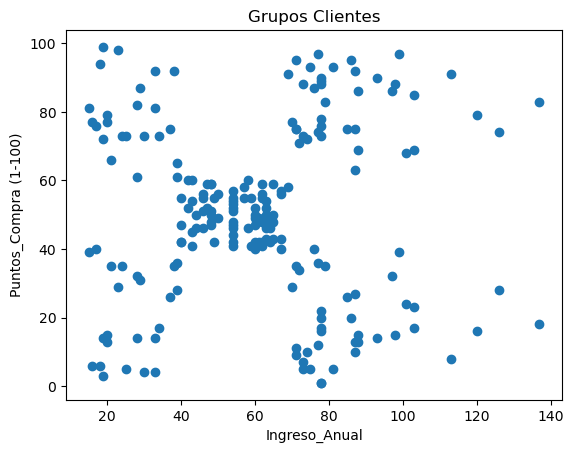

In [44]:
#Grafico antes del agrupamiento.

plt.scatter(Datos['Ingreso_Anual'], Datos['Puntos_Compra (1-100)'])
plt.xlabel('Ingreso_Anual')
plt.ylabel('Puntos_Compra (1-100)')
plt.title('Grupos Clientes')
plt.show()

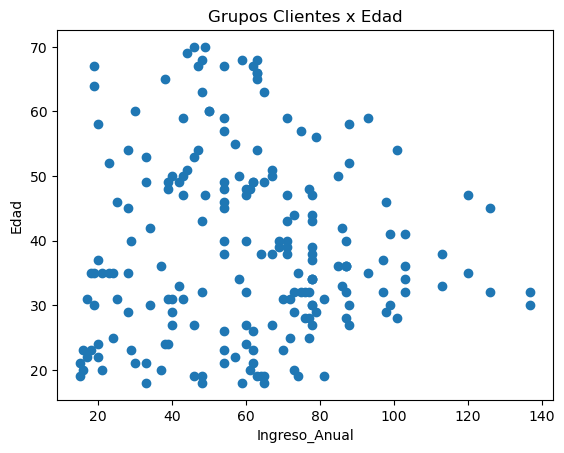

In [45]:
#Grafico antes del agrupamiento.

plt.scatter(Datos['Ingreso_Anual'], Datos['Edad'])
plt.xlabel('Ingreso_Anual')
plt.ylabel('Edad')
plt.title('Grupos Clientes x Edad')
plt.show()

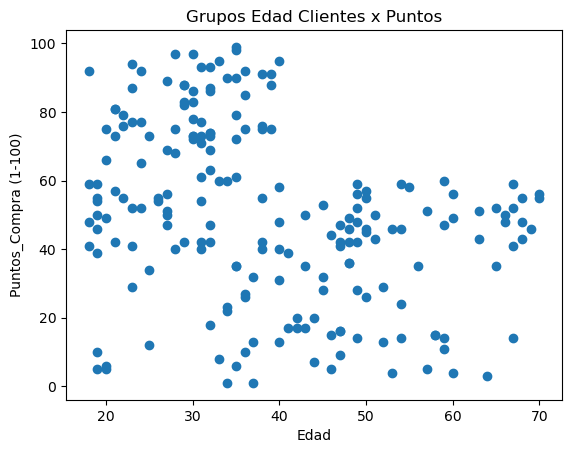

In [46]:
#Grafico antes del agrupamiento.

plt.scatter(Datos['Edad'], Datos['Puntos_Compra (1-100)'])
plt.xlabel('Edad')
plt.ylabel('Puntos_Compra (1-100)')
plt.title('Grupos Edad Clientes x Puntos')
plt.show()

**4. Entrenar el modelo configurando los diferentes hiperparámetros**

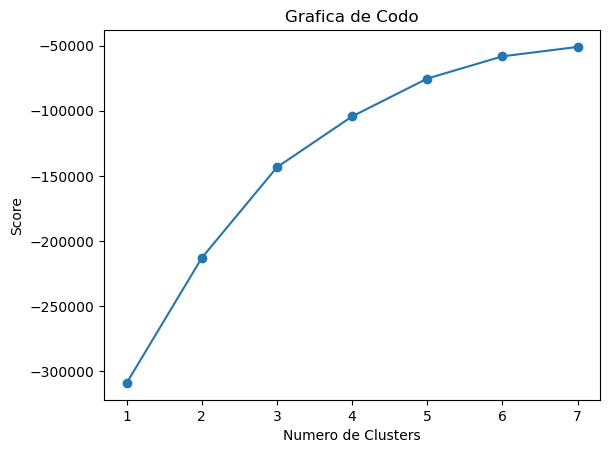

In [47]:
#Se realiza grafico para identificar valor K.

Nc= range(1,8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score,marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('Score')
plt.title('Grafica de Codo')
plt.show()


In [48]:
# Generacion del modelo de agrupamiento con K

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=5, random_state=0)

In [49]:
Modelo.labels_
Datos["Grupo"] = Modelo.labels_
print (Datos)

     Edad  Ingreso_Anual  Puntos_Compra (1-100)  Grupo
0      19             15                     39      0
1      21             15                     81      4
2      20             16                      6      0
3      23             16                     77      4
4      31             17                     40      0
..    ...            ...                    ...    ...
195    35            120                     79      1
196    45            126                     28      3
197    32            126                     74      1
198    32            137                     18      3
199    30            137                     83      1

[200 rows x 4 columns]


**5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.**

In [50]:
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]

]

from tabulate import tabulate
print (tabulate(table_data, headers=["Metrics", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|         Metrics          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.44428597560893024 |
| Indice Calinski Harabasz | 151.04386000160667  |
|  Indice Davies Bouldin   | 0.8218781633199781  |
+--------------------------+---------------------+


**6. Realizar las diferentes gráficas que permitan visualizar los resultados del model**

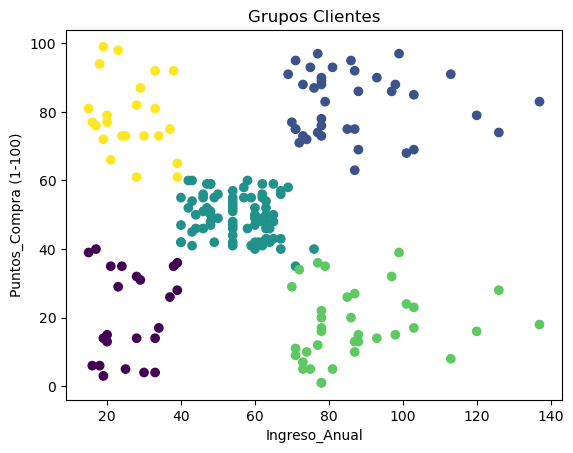

In [54]:
plt.scatter(Datos['Ingreso_Anual'], Datos['Puntos_Compra (1-100)'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Ingreso_Anual')
plt.ylabel('Puntos_Compra (1-100)')
plt.title('Grupos Clientes')
plt.show()

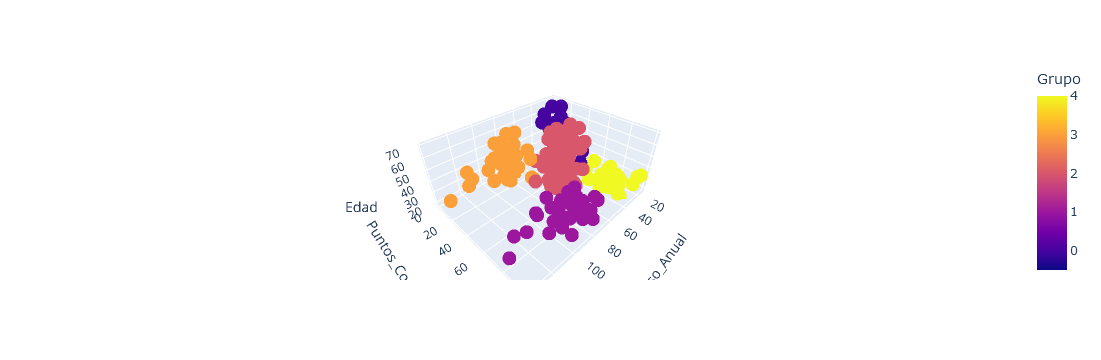

In [52]:
# Grafica 3D de datos agrupados.

Grafica_3D = px.scatter_3d(Datos, x='Ingreso_Anual', y='Puntos_Compra (1-100)', z='Edad', color='Grupo', symbol='Grupo', symbol_map={0:'circle', 1:'circle', 2:'circle', 3:'circle', 4:'circle'})
Grafica_3D.update_layout(showlegend=False)